<a href="https://colab.research.google.com/github/jlombard/FamilyTimes/blob/main/Copy_of_Fritz_Style_Transfer_Train_your_own_style_in_minutes!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fritz Style Transfer

Train your own mobile-friendly style transfer model in minutes. Choose a style, train a model, and download a saved version in Keras, Core ML, or TensorFlow Lite formats.

* To skip the training and get started quickly, head over to [Fritz](https://fritz.ai). 
* To see the final result, try our demo app, Heartbeat, available for both [iOS](bit.ly/heartbeat-ios) and [Android](bit.ly/heartbeat-android). 
* To dive into the soure code, head over to our [GitHub repository](https://github.com/fritzlabs/fritz-models/tree/master/style_transfer). If you find it useful, **star the repository**!

To get started training, **copy this notebook by clicking the "OPEN IN PLAYGROUND" button at the top of the page.**

In [1]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install keras==2.2.4
!pip install git+https://github.com/apple/coremltools.git@v2.1
!pip install tensorflow-gpu==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-b2cioqpv
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-b2cioqpv
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=5e200736954ca46b1cda90cfb288ba3390fd7b6f469947364a149fcaf2585cf4
  Stored in directory: /tmp/pip-ephem-wheel-cache-3zxkkxu6/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 4.9 MB/s 
     |████████████████████████████████| 50 kB 8.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's 

**WARNING**
 You will need to restart the runtime after installing TensorFlow 1.14.0 above.

In [1]:
# First, make sure we're using TensorFlow 1.14.0
# If you get a warning about Colab defaulting to TF 2.X, you can ignore it
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

ImportError: ignored

In [2]:
import sys
import PIL.Image
import os
from IPython.utils import io

## Clone the Fritz Style Transfer Repository

In [3]:
# Install git lfs first so we can get download model checkpoints
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be upgraded:
  git-lfs
1 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.
Need to get 7,168 kB of archives.
After this operation, 7,962 kB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 3.2.0 [7,168 kB]
Fetched 7,168 kB in 1s (10.5 MB/s)
(Reading database ... 155680 file

In [4]:
!git clone https://github.com/fritzlabs/fritz-models.git

Cloning into 'fritz-models'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
# Add the Fritz Style Transfer package to your python path
sys.path.append('/content/fritz-models/style_transfer/')

In [ ]:
!mkdir fritz-models/style_transfer/data/

## Choose a style

Not all style images are equal. For the best results, pick images that:


1.   Have large geometric patterns on the scale of 10% - 33% of the images width
2.   Have bold, contrasting color palletes
3.   Have strong edges

If you're looking for inspiration, consider searching [Unslash](https://unspalsh.com) for [Flickr](https://www.flickr.com/search/) for terms like "abstract" or "geometric".

Make sure any images you use have an appropriate license.


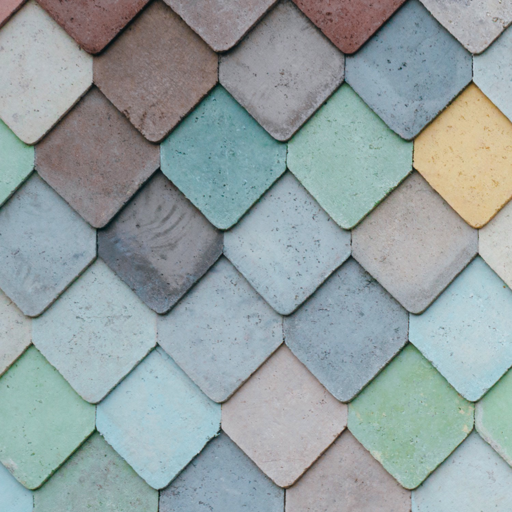

In [ ]:
#@title Choose an image
#@markdown Enter the URL of the style image you want to use. The default is taking from here: https://flic.kr/p/8QaLwY
image_url = "https://images.unsplash.com/photo-1458682625221-3a45f8a844c7?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1567&q=80" #@param {type:"string"}

#@markdown Optionally add crop to create a better pattern. You may not need this
crop_image = True #@param {type:"boolean"}
if crop_image:
    crop_box = [0, 0, 1500, 1500] #@param {type:"raw"}


with io.capture_output(stderr=False) as captured:
    !cd fritz-models/style_transfer/data/ && wget -O style_image.jpg $image_url

style_image = PIL.Image.open('fritz-models/style_transfer/data/style_image.jpg')

if crop_image:
    style_image = style_image.crop(box=crop_box)

style_image.resize((512, 512))



## Download Training Data

We will use the 5000 images from the [COCO 2017 validation](http://cocodataset.org/#download) dataset for training.

In [ ]:
training_data_url = "http://images.cocodataset.org/zips/val2017.zip"

!cd fritz-models/style_transfer/data/ && wget $training_data_url

print("Unzipping")
with io.capture_output(stderr=False):
    !unzip -o -d fritz-models/style_transfer/data/ fritz-models/style_transfer/data/val2017.zip

print(f"Finished Downloading data")

## Convert Training Data to TFRecord

This typically takes a minute or two to run.

In [ ]:
!python fritz-models/style_transfer/create_training_dataset.py \
--output fritz-models/style_transfer/data/training_images.tfrecord \
--image-dir fritz-models/style_transfer/data/val2017/


In [ ]:
!cd fritz-models/style_transfer/ && export PYTHONPATH=`pwd` && python style_transfer/train.py \
--training-image-dset data/training_images.tfrecord \
--style-images data/style_image.jpg \
--model-checkpoint data/my_style_025.h5 \
--image-size 256,256 \
--alpha 0.25 \
--num-iterations 250 \
--batch-size 24 \
--style-weight 0.0005 \
--fine-tune-checkpoint example/starry_night_256x256_025.h5


## Stylize an image!

In [ ]:
#@title Build Model
import style_transfer.models
import keras
from PIL import Image
from matplotlib import pyplot
import requests
from io import BytesIO
import numpy
from IPython.display import Markdown



def download_image(image_url):
    response = requests.get(image_url)
    return PIL.Image.open(BytesIO(response.content))


def run_prediction(model, image, image_size):
    image = image.resize(image_size)
    input_data = numpy.array(image)[None, :, :, :3]
    output_data = model.predict(input_data)
    return PIL.Image.fromarray(output_data[0].astype('uint8'))


# Clear the keras session of the training we just did
keras.backend.clear_session()
# Load the model
image_size = (640, 640) #@param {type:"raw"}
model = style_transfer.models.StyleTransferNetwork.build(
    image_size,
    alpha=0.25, 
    checkpoint_file='/content/fritz-models/style_transfer/data/my_style_025.h5'
)

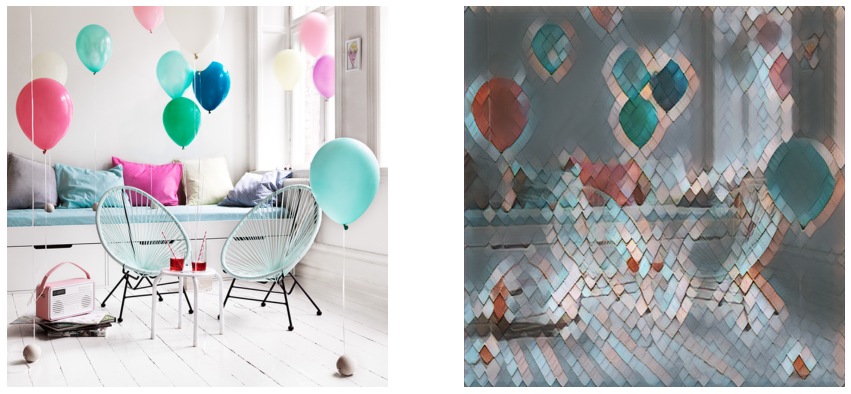

In [ ]:
#@title Stylize an Image!
image_url = 'https://farm3.staticflickr.com/2907/14746369554_b783ba8d13_o_d.png' #@param {type:"string"}
image = download_image(image_url)
stylized_image = run_prediction(model, image, image_size)

fig, ax = pyplot.subplots(1,2);
fig.set_size_inches(15, 7)
ax[0].axis('off')
ax[1].axis('off')

ax[0].imshow(image);
ax[1].imshow(stylized_image);



In [ ]:
# Download the model
from google.colab import files
files.download('/content/fritz-models/style_transfer/data/my_style_025.h5')

## Convert out model to Core ML

In [ ]:
!python fritz-models/style_transfer/convert_to_coreml.py \
--keras-checkpoint fritz-models/style_transfer/data/my_style_025.h5 \
--alpha 0.25 \
--image-size 640,640 \
--coreml-model fritz-models/style_transfer/data/my_style_025.mlmodel


python3: can't open file 'fritz-models/style_transfer/convert_to_coreml.py': [Errno 2] No such file or directory


In [ ]:
# Download the mlmodel
from google.colab import files
files.download('/content/fritz-models/style_transfer/data/my_style_025.mlmodel')

## Convert to TensorFlow Lite

In [ ]:
!python fritz-models/style_transfer/convert_to_tflite.py \
--keras-checkpoint fritz-models/style_transfer/data/my_style_025.h5 \
--alpha 0.25 \
--image-size 400,300 \
--tflite-file fritz-models/style_transfer/data/my_style_025.tflite


In [ ]:
# Download the optimized graph
from google.colab import files

files.download('/content/fritz-models/style_transfer/data/my_style_025.tflite')

# Upload and deploy models to your app with the Fritz Python Client

Constantly downloading models, dragging them into Xcode, and waiting for your app to build is a pain. To make the process faster and easier, we've created a Python client that allows new versions of models to be uploaded to Fritz and pushed to devices after or even during training.

Here's how it works:

1. If you don't already have one, create a [Fritz account](https://fritz.ai).
2. In the Account Menu under My Account, copy the configure command, which sets up the configuration to authenticate requests made from the Python Client.
3. Use the code below to send new versions of the model to your app via Fritz.

## Train the model

With a GPU attached, you should be able to use a batch size of 24 images. With a batch size of 24, 500 iteratorations should be fine to get us to 12,000 total steps. Because the style we've chosen is highly geometric with a large pattern, lets decrease the style weight by a factor of 10 to make the output look more like the original pictures.

Training on a GPU takes about 20 minutes. If you get memory errors, it probably means your runtime is trying to use the CPU or your batch size is too big. Training on TPUs is not yet supported.

In [ ]:
!pip install fritz

In [ ]:
!fritz config
!fritz model upload fritz-stable-style-transfer/data/my_style_025.mlmodel